In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [5]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [6]:
df.shape

(42000, 785)

In [7]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5907,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt


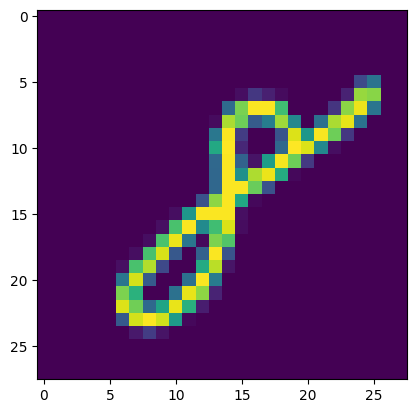

In [9]:
plt.imshow(df.iloc[25989,1:].values.reshape(28,28))

In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
X_train.shape

(33600, 784)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier()

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [76]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

13.077350378036499


In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [12]:
# pca 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [14]:
# PCA
from sklearn.decomposition import PCA
pca = PCA (n_components=200)


In [15]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [16]:
X_train.shape

(33600, 784)

In [17]:
X_train_trf.shape

(33600, 200)

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [22]:
import time
start = time.time()
y_pred = knn.predict(X_test_trf)
print(time.time()-start)

2.798072099685669


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9514285714285714

In [96]:
for i in range(1,785):
    pca = PCA (n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred) )


0.2586904761904762
0.3242857142857143
0.5103571428571428
0.6663095238095238
0.7375
0.8228571428571428
0.8436904761904762
0.8717857142857143
0.8858333333333334
0.9058333333333334
0.9113095238095238
0.9182142857142858
0.9285714285714286
0.9353571428571429
0.9385714285714286
0.9386904761904762
0.94
0.9416666666666667
0.9422619047619047
0.9442857142857143
0.9441666666666667
0.9438095238095238
0.9448809523809524
0.9446428571428571
0.9482142857142857
0.9483333333333334
0.9476190476190476
0.9471428571428572
0.9495238095238095
0.95
0.9508333333333333
0.9510714285714286
0.9504761904761905
0.9513095238095238
0.9517857142857142
0.9517857142857142
0.9520238095238095
0.9533333333333334
0.9529761904761904
0.9542857142857143
0.9523809523809523
0.9528571428571428


KeyboardInterrupt: 

In [24]:
pca = PCA (n_components=2)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [25]:
X_train_trf

array([[-2.71865825, -0.48991921],
       [-0.6769953 , -6.75310941],
       [-3.03315572,  6.50960589],
       ...,
       [ 2.14887758,  0.78122781],
       [ 1.05950536,  0.94735674],
       [17.70249305,  1.96185597]])

In [28]:
import plotly.express as px

# Convert y_train to string if it isn't already
y_train_trf = y_train.astype(str)

# Create the scatter plot
fig = px.scatter(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    color=y_train_trf,
    labels={'x': 'Feature 1', 'y': 'Feature 2', 'color': 'Target'},
    color_discrete_sequence=px.colors.qualitative.G10
)

# Display the plot
fig.show()


In [29]:
pca = PCA (n_components=3)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [30]:
X_train_trf

array([[-2.71864436, -0.48968708,  1.13553053],
       [-0.67696848, -6.75381056, -2.33591145],
       [-3.03320923,  6.50965365,  7.49170862],
       ...,
       [ 2.14885885,  0.78038636, -0.74702088],
       [ 1.05954243,  0.94801911,  3.94969689],
       [17.70256289,  1.96224241, -4.94380445]])

In [32]:
import plotly.express as px

# Convert y_train to string if it isn't already
y_train_trf = y_train.astype(str)

# Create the 3D scatter plot
fig = px.scatter_3d(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    z=X_train_trf[:, 2],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

# Display the plot
fig.show()


In [37]:
pca.explained_variance_
# eigen values 

array([40.67111198, 29.17023397, 26.74459618])

In [39]:
pca.components_.shape

(3, 784)

In [40]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [41]:
pca = PCA (n_components=None)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [42]:
pca.explained_variance_.shape

(784,)

In [43]:
pca.components_.shape

(784, 784)

In [46]:
np.cumsum(pca.explained_variance_ratio_)*100

array([  5.78519225,   9.93446193,  13.73870094,  16.70496371,
        19.2865254 ,  21.54150558,  23.5145736 ,  25.28985357,
        26.85850424,  28.29456752,  29.66482235,  30.89207736,
        32.03898935,  33.16201674,  34.22054559,  35.24047664,
        36.1981528 ,  37.14086161,  38.05335104,  38.94352123,
        39.78346173,  40.60352492,  41.38882815,  42.14556786,
        42.88282888,  43.58471353,  44.28263326,  44.95373775,
        45.59358278,  46.22392007,  46.83927092,  47.44165957,
        48.02533355,  48.6038813 ,  49.17621445,  49.72261423,
        50.2658216 ,  50.79399435,  51.30737609,  51.80139157,
        52.28906267,  52.77104144,  53.23924587,  53.69858836,
        54.15624919,  54.60546821,  55.05015043,  55.49169118,
        55.92680312,  56.35883605,  56.78064492,  57.19888804,
        57.60688239,  58.00888731,  58.40722316,  58.80182197,
        59.18869358,  59.57188877,  59.94844139,  60.32263485,
        60.68748701,  61.04828955,  61.402176  ,  61.75

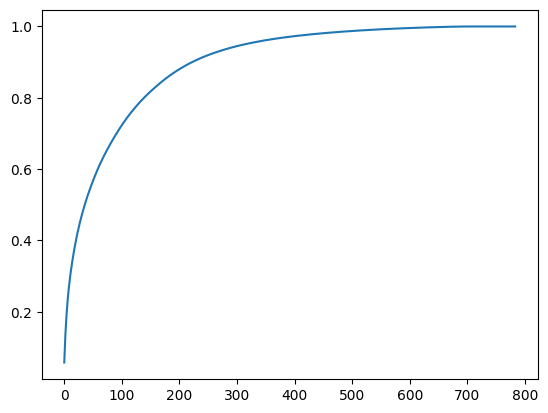

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))